In [94]:
import pandas as pd
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt

In [16]:
names = []
with open("names.txt",'r') as f:
    names = [ '.'+name.strip()+'.' for name in f.readlines()]

In [26]:
ascii_a = ord('a')
stoi = {chr(i): i-ascii_a+1 for i in range(ascii_a,ascii_a+26)}
stoi['.'] = 0

In [59]:
freq = torch.ones(27,27)

for name in names:
    for c1,c2 in zip(name,name[1:]):
        i,j = stoi[c1],stoi[c2]
        freq[i][j] += 1

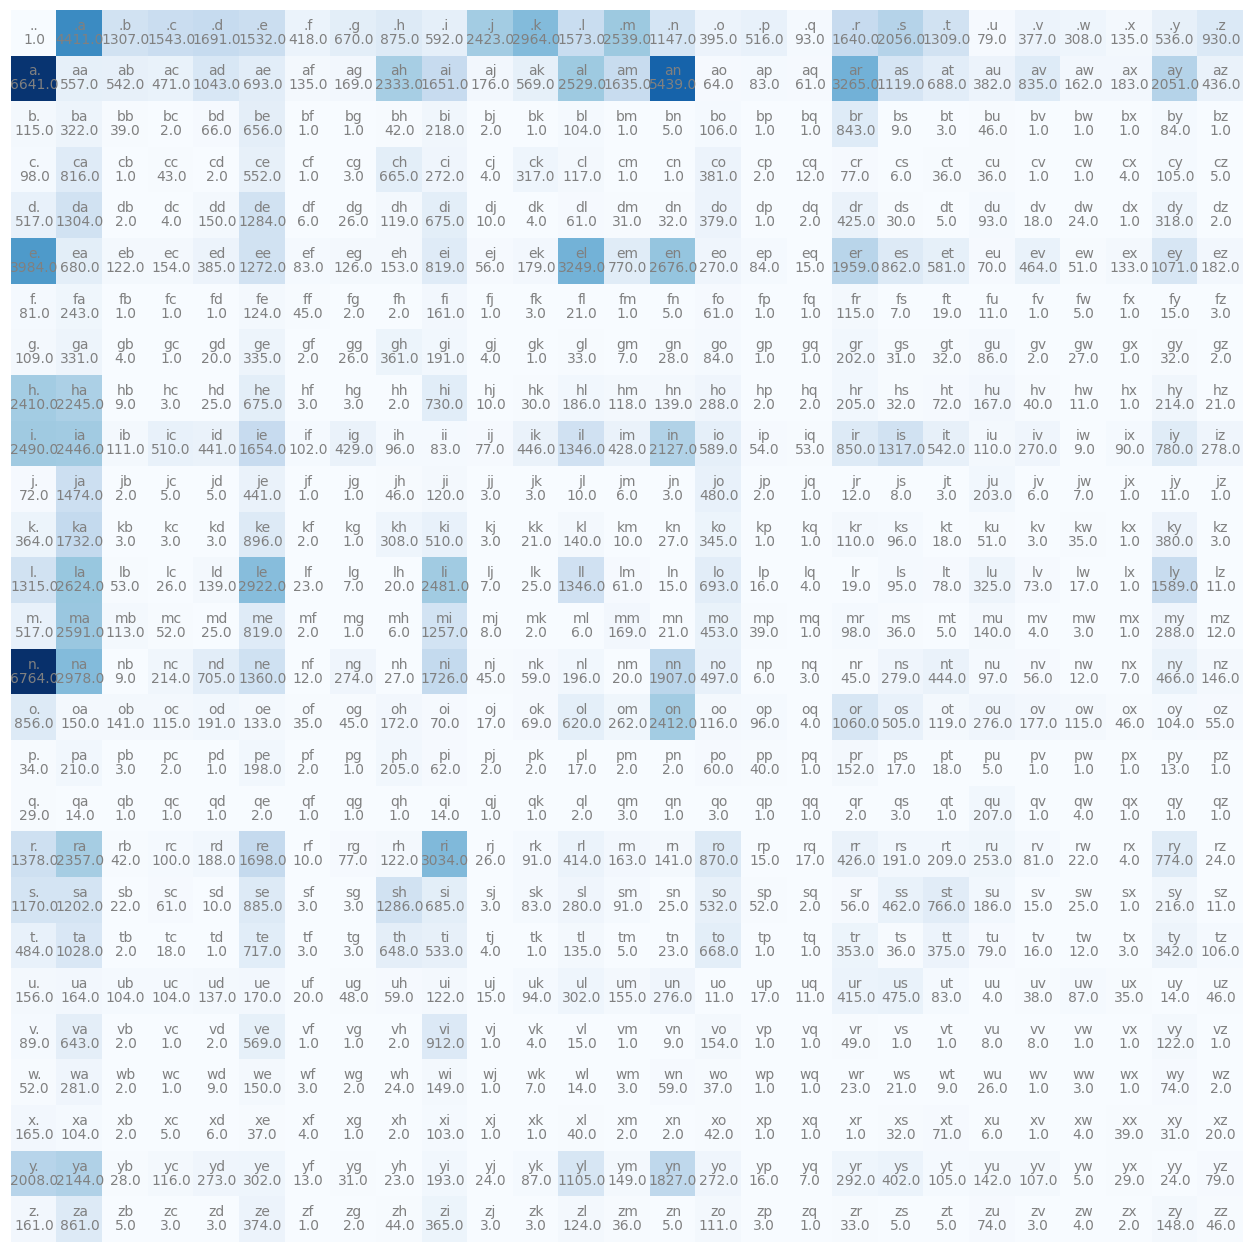

In [60]:
itos = {v:k for k,v in stoi.items()}

plt.figure(figsize=(16,16))
plt.imshow(freq, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, freq[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');



In [69]:
proba = freq/freq.sum(keepdim=True,dim=1)

In [66]:
def sample():
    curr = 0
    word = ""
    while True:
        curr = torch.multinomial(proba[curr],1,replacement=True).item()
        if curr == 0:
            return word
        else:
            word += itos[curr]

In [67]:
for i in range(20): print(sample())

qumabyxweffuisizicombusthigguqumowaeroffeyaxzufyligw
whelustzursminndrntopwahalunzilin
bdawayppprbyocquwecogghoukah
ky
geffiqubriluwqquduqugrnn
lfix
jugllackhmachvfariqupphoqmarenqumffleyochckkannzuzonnoswillydivichaworuwxxirecooveli
tohe
bamphmbeffembenahlledostrodi
zzukiuka
madbbbrqxxxxaxzyubr
n
khyqublfffoxxxykemmyndynon
hrexfwesdokxxxzwezahockiyuluwstelrqug
malorstvetlydh
rqucosybrqphkopevuffosmelystazavz
matoriqusha
shimevyje
wwqufffffrkayxvrgemcurextorcarequrppphmujondikwighuwiforongugwwicyuxxsozamizafiydumave
dorygwizjwivviosstivylarzzywyoveriyanazaiuwsheich


In [77]:
log_likelihood = 0.0
n = 0

for name in names:
    for c1,c2 in zip(name,name[1:]):
        i,j = stoi[c1],stoi[c2]
        log_likelihood += torch.log(proba[i][j])
        n += 1
        
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


### same model with NN

In [91]:
X,y = [],[]

for name in names:
    for c1,c2 in zip(name,name[1:]):
        X.append(stoi[c1])
        y.append(stoi[c2])

X,y = torch.tensor(X),torch.tensor(y)


In [93]:
W = torch.randn((27,27), requires_grad=True)

In [102]:
X_enc = F.one_hot(X,num_classes=27).float()

In [103]:
for i in range(100):
    logits = X_enc @ W
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdim=True)
    loss = -probs[torch.arange(len(X_enc)), y].log().mean() + 0.01*(W**2).mean()
    print(loss.item())

    W.grad = None
    loss.backward()
    W.data += -50*W.grad


3.670147180557251
3.3338141441345215
3.1384472846984863
3.0072386264801025
2.911325454711914
2.8412320613861084
2.789637804031372
2.750521183013916
2.719733953475952
2.694789409637451
2.6741678714752197
2.6568400859832764
2.6420671939849854
2.6293113231658936
2.6181797981262207
2.6083812713623047
2.5996952056884766
2.591949939727783
2.585008144378662
2.578758478164673
2.5731089115142822
2.567981004714966
2.5633082389831543
2.559035539627075
2.5551137924194336
2.5515034198760986
2.5481677055358887
2.545077323913574
2.542206287384033
2.539531707763672
2.537034511566162
2.5346975326538086
2.5325067043304443
2.5304486751556396
2.5285115242004395
2.526686668395996
2.524963855743408
2.523336172103882
2.5217957496643066
2.5203371047973633
2.518953800201416
2.517641067504883
2.5163936614990234
2.5152077674865723
2.5140795707702637
2.513005018234253
2.511981248855591
2.5110044479370117
2.510072708129883
2.5091824531555176
2.5083320140838623
2.507519006729126
2.5067408084869385
2.505996227264404

In [107]:
def nn_sample():
    curr = 0
    word = ""
    while True:
        inp = F.one_hot(torch.tensor([curr]), num_classes=27).float()
        logits = inp @ W
        counts = logits.exp()
        p = counts/counts.sum(1,keepdim=True)

        curr = torch.multinomial(p,1,replacement=True).item()
        if curr == 0:
            return word
        else:
            word += itos[curr]

In [110]:
nn_sample()

'honlylonn'